## Airbnb Paris - Exploratory Data Analysis (EDA)

Objective
The goal of this project is to perform an exploratory data analysis of Airbnb listings in Paris.
The analysis focuses on pricing, differences between neighbourhoods, and selected relationships
(e.g. price vs number of guests, trends over time).

Scope
- data loading and initial inspection
- data cleaning and preparation
- exploratory data analysis (EDA)
- visualisation of key patterns
- summary of findings and limitations

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from pathlib import Path

Dataset

File: `Listings.csv` (Airbnb listings for Paris)

> Note: The exact data source (e.g. Inside Airbnb, Kaggle) will be documented in the README file.
> This notebook focuses on data quality, exploration, and analytical insights.

In [53]:
PROJECT_DIR = Path.cwd()
RAW_PATH = PROJECT_DIR / "data"
RAW_PATH.mkdir(parents=True, exist_ok=True)

In [54]:
df_listings = pd.read_csv(
    RAW_PATH/"Listings.csv",
    low_memory=False,
    encoding="ISO-8859-1",
    parse_dates=["host_since"]
)

## Data overview

In this section, I:
- check the number of rows and columns
- preview sample records
- identify potential data quality issues (missing values, data types, duplicates)

In [55]:
df_listings.head()

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,3705183,39 mÃÂ² Paris (Sacre CÃ âur),10328771,2013-11-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
3,4797344,Cosy studio (close to Eiffel tower),10668311,2013-12-17,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,2014-12-14,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


In [56]:
df_listings.info()

<class 'pandas.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   listing_id                   279712 non-null  int64         
 1   name                         279537 non-null  str           
 2   host_id                      279712 non-null  int64         
 3   host_since                   279547 non-null  datetime64[us]
 4   host_location                278872 non-null  str           
 5   host_response_time           150930 non-null  str           
 6   host_response_rate           150930 non-null  float64       
 7   host_acceptance_rate         166625 non-null  float64       
 8   host_is_superhost            279547 non-null  str           
 9   host_total_listings_count    279547 non-null  float64       
 10  host_has_profile_pic         279547 non-null  str           
 11  host_identity_verified       279547 n

## Data cleaning and preparation

The purpose of this step is to prepare the dataset for analysis and visualisation.

Main actions include:
- checking missing values and outliers
- selecting relevant variables for further analysis

In [57]:
df_listings.dtypes.to_frame()

,0
listing_id,int64
name,str
host_id,int64
host_since,datetime64[us]
host_location,str
host_response_time,str
host_response_rate,float64
host_acceptance_rate,float64
host_is_superhost,str
host_total_listings_count,float64


In [58]:
paris_listings = (
    df_listings
    .query("city == 'Paris'")
    .loc[:, ["host_since", "neighbourhood", "city", "accommodates", "price"]]
)

paris_listings.info()

<class 'pandas.DataFrame'>
Index: 64690 entries, 0 to 279711
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   host_since     64657 non-null  datetime64[us]
 1   neighbourhood  64690 non-null  str           
 2   city           64690 non-null  str           
 3   accommodates   64690 non-null  int64         
 4   price          64690 non-null  int64         
dtypes: datetime64[us](1), int64(2), str(2)
memory usage: 3.0 MB


In [59]:
paris_listings.head()

,host_since,neighbourhood,city,accommodates,price
0,2011-12-03,Buttes-Montmartre,Paris,2,53
1,2013-11-29,Buttes-Montmartre,Paris,2,120
2,2014-07-31,Elysee,Paris,2,89
3,2013-12-17,Vaugirard,Paris,2,58
4,2014-12-14,Passy,Paris,2,60


In [60]:
missing_percent = paris_listings.isna().mean() * 100
missing_percent

host_since       0.051013
neighbourhood    0.000000
city             0.000000
accommodates     0.000000
price            0.000000
dtype: float64

In [61]:
paris_listings.describe().round(2)

,host_since,accommodates,price
count,64657,64690.00,64690.00
mean,2015-11-01 11:06:05.528867,3.04,113.10
min,2008-08-30 00:00:00,0.00,0.00
25%,2014-03-09 00:00:00,2.00,59.00
50%,2015-07-07 00:00:00,2.00,80.00
75%,2017-05-29 00:00:00,4.00,120.00
max,2021-02-07 00:00:00,16.00,12000.00
std,NaN,1.59,214.43


In [62]:
paris_listings.query("price == 0 and accommodates == 0").count()

host_since       54
neighbourhood    54
city             54
accommodates     54
price            54
dtype: int64

## EDA 1 - Prices by neighbourhood

This section explores price differences between Paris neighbourhoods.
The chart shows the average listing price grouped by neighbourhood.

In [63]:
paris_listings_neighbourhood = (
    paris_listings
    .groupby("neighbourhood")
    .agg({"price": "mean"})
    .sort_values("price")
)

paris_listings_neighbourhood.tail()

,price
neighbourhood,
Luxembourg,155.638639
Palais-Bourbon,156.856578
Passy,161.144635
Louvre,175.379972
Elysee,210.536765


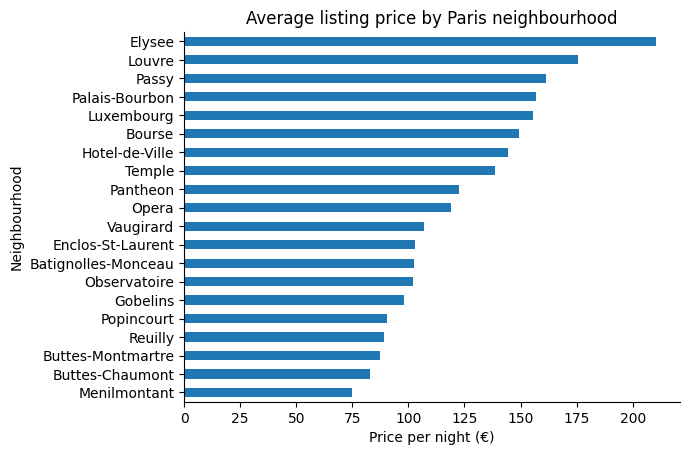

In [64]:
import seaborn as sns

(paris_listings_neighbourhood
 .plot
 .barh(
    title="Average listing price by Paris neighbourhood",
    xlabel="Price per night (€)",
    ylabel="Neighbourhood",
    legend=None
    )
 )

sns.despine()

## EDA 2 - Price vs number of guests (example: Elysee)

Hypothesis: listing price increases with the number of guests the property can accommodate (`accommodates`).

The analysis is limited to a single neighbourhood to reduce the impact of different market segments.

In [65]:
paris_listings_accommodates = (
    paris_listings
    .query("neighbourhood == 'Elysee'")
    .groupby("accommodates")
    .agg({"price": "mean"})
    .sort_values("price")  
)

paris_listings_accommodates.head()

,price
accommodates,
0,0.000000
1,79.522222
3,152.828767
2,155.103352
4,212.096070


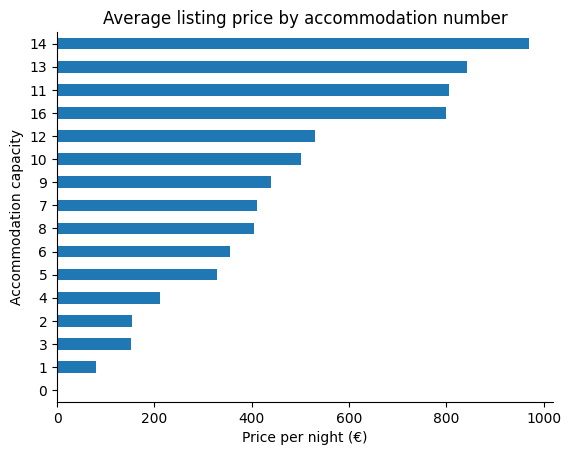

In [66]:
(paris_listings_accommodates
 .plot
 .barh(
    title="Average listing price by accommodation number",
    xlabel="Price per night (€)",
    ylabel="Accommodation capacity",
    legend=None
    )
 )

sns.despine()

## EDA 3 - Trends over time

This section analyses changes over time, focusing on:
- the number of new hosts (based on host registration dates)
- average listing prices

In [67]:
paris_listings_over_time = (
    paris_listings
    .set_index("host_since")
    .resample("YE")
    .agg({
        "neighbourhood": "count",
        "price": "mean"
    })
)

paris_listings_over_time.head()

,neighbourhood,price
host_since,,
2008-12-31,4,77.750000
2009-12-31,106,159.641509
2010-12-31,416,125.031250
2011-12-31,1339,124.828230
2012-12-31,4592,111.578615


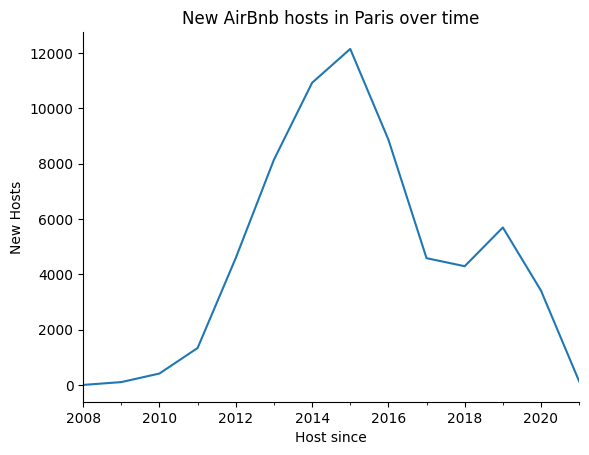

In [68]:
paris_listings_over_time["neighbourhood"].plot(
    ylabel="New Hosts",
    xlabel="Host since",
    title="New AirBnb hosts in Paris over time"
)

sns.despine()

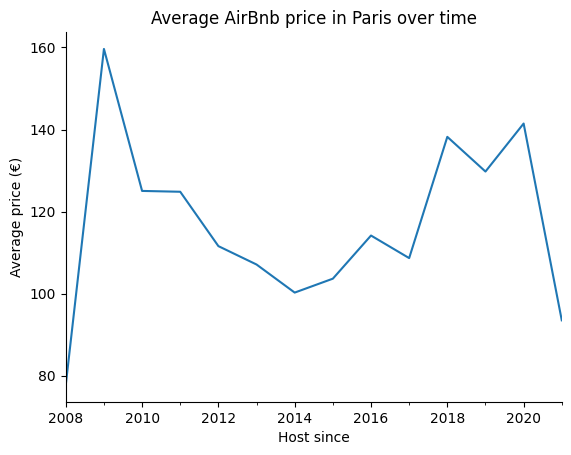

In [69]:
paris_listings_over_time["price"].plot(
    ylabel="Average price (€)",
    xlabel="Host since",
    title="Average AirBnb price in Paris over time"
)

sns.despine()

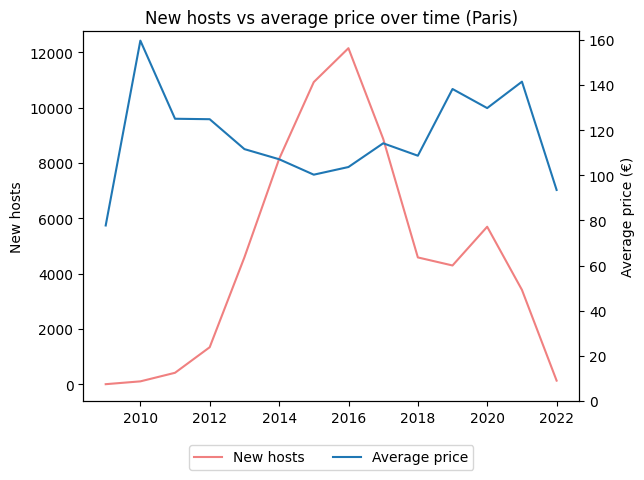

In [70]:
fig, ax = plt.subplots()

line1, = ax.plot(
    paris_listings_over_time.index,
    paris_listings_over_time["neighbourhood"],
    label="New hosts", 
    c="lightcoral"
)

ax.set_ylabel("New hosts")

ax2 = ax.twinx()

line2, = ax2.plot(
    paris_listings_over_time.index,
    paris_listings_over_time["price"],
    label="Average price",
)

ax2.set_ylim(0)
ax2.set_ylabel("Average price (€)")
ax.set_title("New hosts vs average price over time (Paris)")

lines = [line1, line2]
labels = [line.get_label() for line in lines]

ax.legend(lines, 
          labels, 
          loc="upper center",
          bbox_to_anchor=(0.5, -0.1),
          ncol=2
          )

plt.show()

## Key findings

Based on the exploratory analysis, several patterns can be observed:

- Average listing prices differ significantly between Paris neighbourhoods, indicating strong location effects.
- In the Elysee neighbourhood, listing prices generally increase with the number of guests a property can accommodate, although the relationship is not perfectly linear.
- Over time, changes in average prices and the number of new hosts show visible trends, suggesting structural changes in the market.